# Covid-19 Global Data Tracker

### Data Loading & Exploration: Load the dataset

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("owid-covid-data.csv")

# Check column names
print("Column Names:\n", df.columns)

# Preview first few rows
print("\nFirst 5 rows:\n", df.head())

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())


Column Names:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoot

### Data Cleaning: Prepare data for analysis

In [ ]:
# Defining the expected columns for analysis
expected_columns = [
    "iso_code", "continent", "location", "date", "total_cases", "new_cases", "new_cases_smoothed", 
    "total_deaths", "new_deaths", "new_deaths_smoothed", "total_cases_per_million", 
    "new_cases_per_million", "new_cases_smoothed_per_million", "total_deaths_per_million", 
    "new_deaths_per_million", "new_deaths_smoothed_per_million", "reproduction_rate", 
    "icu_patients", "icu_patients_per_million", "hosp_patients", "hosp_patients_per_million", 
    "weekly_icu_admissions", "weekly_icu_admissions_per_million", "weekly_hosp_admissions", 
    "weekly_hosp_admissions_per_million", "total_tests", "new_tests", "total_tests_per_thousand", 
    "new_tests_per_thousand", "new_tests_smoothed", "new_tests_smoothed_per_thousand", 
    "positive_rate", "tests_per_case", "tests_units", "total_vaccinations", "people_vaccinated", 
    "people_fully_vaccinated", "total_boosters", "new_vaccinations", "new_vaccinations_smoothed", 
    "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", 
    "people_fully_vaccinated_per_hundred", "total_boosters_per_hundred", 
    "new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed", 
    "new_people_vaccinated_smoothed_per_hundred", "stringency_index", "population_density", 
    "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita", "extreme_poverty", 
    "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", 
    "handwashing_facilities", "hospital_beds_per_thousand", "life_expectancy", 
    "human_development_index", "population", "excess_mortality_cumulative_absolute", 
    "excess_mortality_cumulative", "excess_mortality", "excess_mortality_cumulative_per_million"
]

# Ensure dataset contains expected columns
missing_columns = set(expected_columns) - set(df.columns)
if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Handle missing numerical values with interpolation for smooth trends
numeric_columns = [
    "total_cases", "new_cases", "new_cases_smoothed", "total_deaths", "new_deaths",
    "new_deaths_smoothed", "total_tests", "new_tests", "positive_rate", 
    "total_vaccinations", "people_vaccinated", "people_fully_vaccinated", "total_boosters",
    "new_vaccinations", "new_vaccinations_smoothed", "life_expectancy", "gdp_per_capita",
    "hospital_beds_per_thousand"
]
df[numeric_columns] = df[numeric_columns].interpolate(method="linear")

# Filter data for specific countries of interest
countries_of_interest = ["Kenya", "Nigeria", "India"]
df_filtered = df[df["location"].isin(countries_of_interest)]

# Drop rows where critical fields are missing
critical_fields = ["date", "total_cases", "total_deaths", "total_vaccinations"]
df_filtered.dropna(subset=critical_fields, inplace=True)

# Sort data for time series analysis
df_filtered.sort_values(by=["location", "date"], inplace=True)

# Save processed data
df_filtered.to_csv("cleaned_covid_data.csv", index=False)
print("\nCleaned data saved as 'cleaned_covid_data.csv'. Ready for analysis!")

### Exploratory Data Analysis: Generate descriptive statistics & explore trends

### Plot total cases over time for selected countries

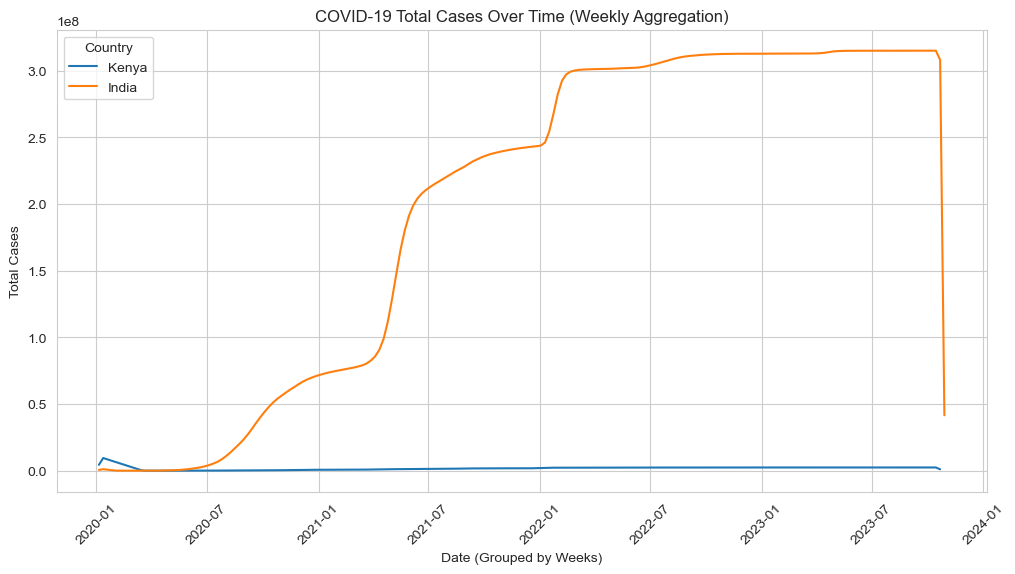

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Group data by weeks for better visibility
df.set_index("date", inplace=True)

for country in ["Kenya", "India"]:
    country_data = df[df["location"] == country]
    weekly_data = country_data.resample("W").sum()  # Group by week

    plt.plot(weekly_data.index, weekly_data["total_cases"], label=country)

# Formatting the chart
plt.xlabel("Date (Grouped by Weeks)")
plt.ylabel("Total Cases")
plt.title("COVID-19 Total Cases Over Time (Weekly Aggregation)")
plt.legend(title="Country")
plt.xticks(rotation=45)

# Show plot
plt.show()


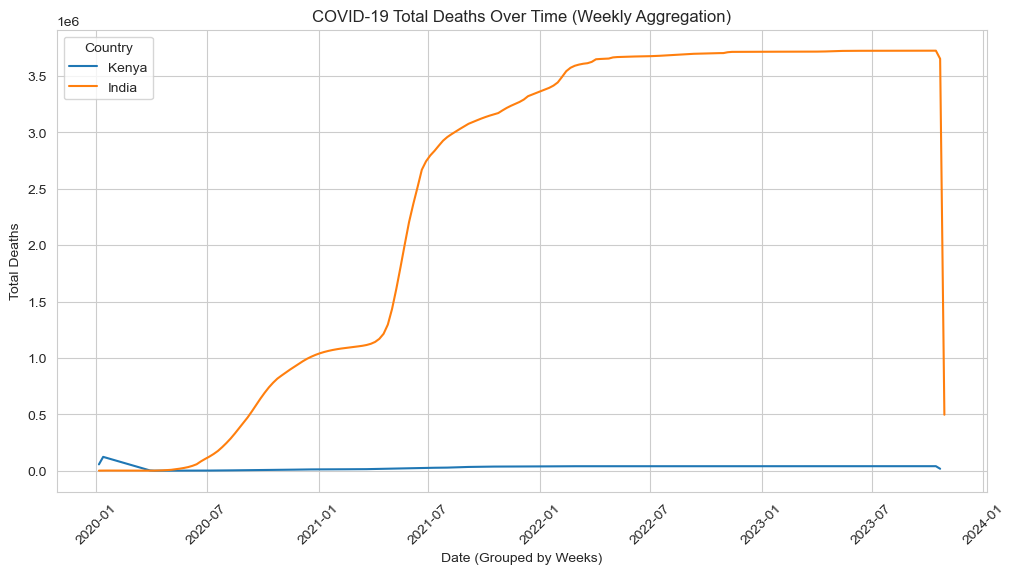

In [13]:
# Plot total deaths over time
# Load the cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Group data by weeks for smoother trends
df.set_index("date", inplace=True)

for country in ["Kenya", "India"]:
    country_data = df[df["location"] == country]
    weekly_data = country_data.resample("W").sum()  # Group by week

    plt.plot(weekly_data.index, weekly_data["total_deaths"], label=country)

# Formatting the chart
plt.xlabel("Date (Grouped by Weeks)")
plt.ylabel("Total Deaths")
plt.title("COVID-19 Total Deaths Over Time (Weekly Aggregation)")
plt.legend(title="Country")
plt.xticks(rotation=45)

# Show plot
plt.show()


/var/folders/2p/krdl6zw519qfpcf66_yl4t8c0000gn/T/ipykernel_93411/2181667413.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_filtered.resample("M").sum().reset_index()


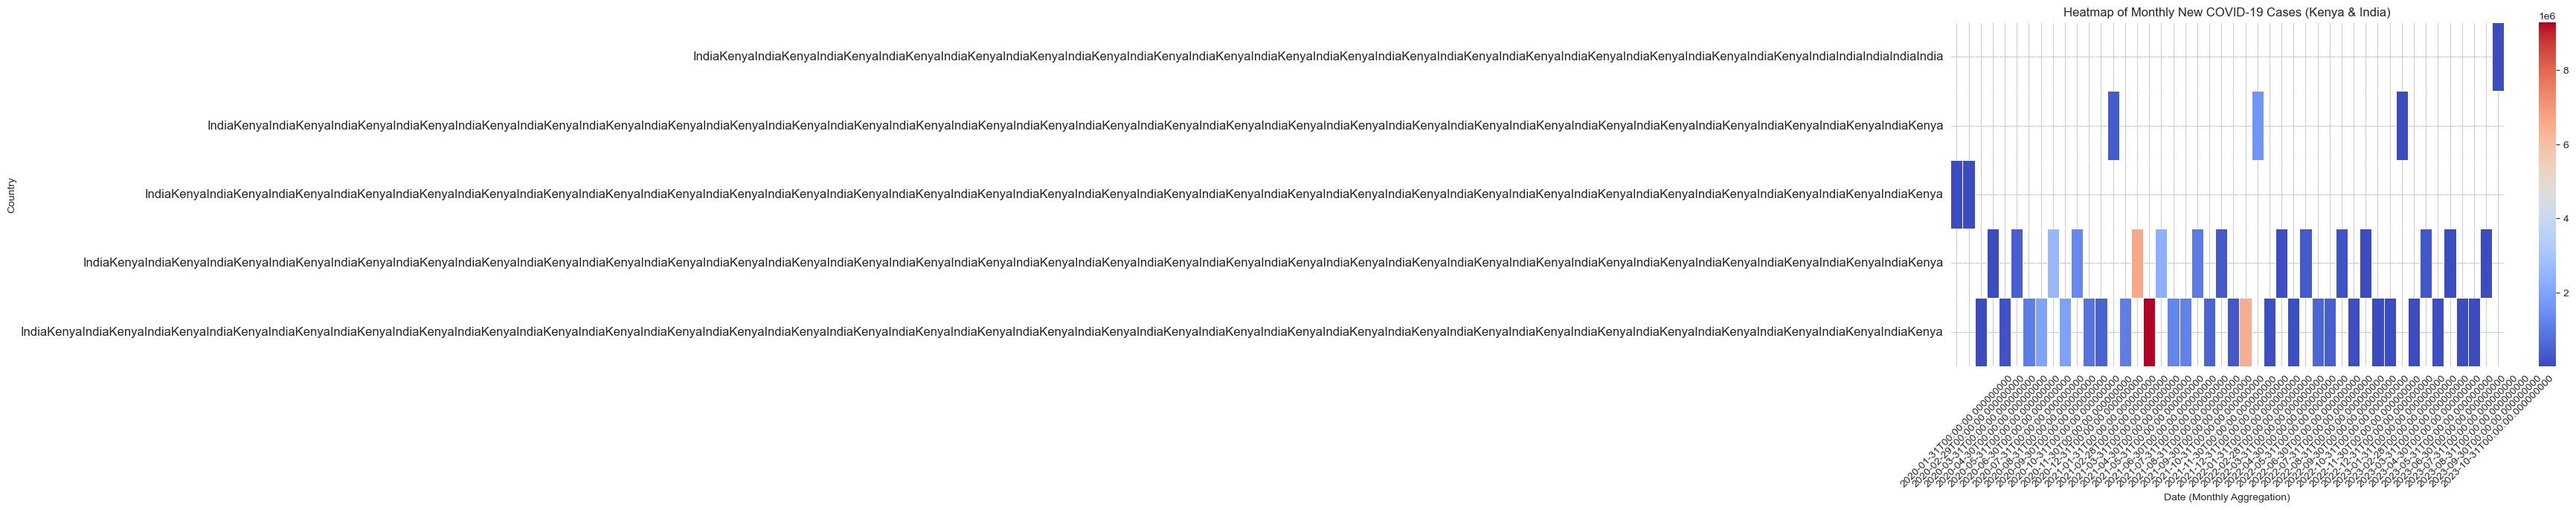

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya & India only
df_filtered = df[df["location"].isin(["Kenya", "India"])]

# Group by months instead of daily values
df_filtered.set_index("date", inplace=True)
monthly_data = df_filtered.resample("M").sum().reset_index()

# Pivot dataset for heatmap (monthly aggregation)
heatmap_data = monthly_data.pivot_table(index="date", columns="location", values="new_cases", aggfunc="sum")

# Ensure proper y-axis labels
heatmap_data.columns.name = None  # Remove index name to avoid duplication

# Set plot style
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="coolwarm", linewidths=0.5, annot=False)

# Formatting the chart
plt.xlabel("Date (Monthly Aggregation)")
plt.ylabel("Country")
plt.title("Heatmap of Monthly New COVID-19 Cases (Kenya & India)")
plt.xticks(rotation=45)
plt.yticks(rotation=0, fontsize=12)  # Keep country labels uncluttered

# Show plot
plt.show()


In [ ]:
# Calculate the death rate: total_deaths / total_cases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date to datetime format
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya & India
df_filtered = df[df["location"].isin(["Kenya", "India"])]

# Calculate death rate (handling divide-by-zero cases)
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
df_filtered["death_rate"].fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Group by month for better visualization
df_filtered.set_index("date", inplace=True)
monthly_data = df_filtered.resample("M").mean().reset_index()

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot death rate over time for each country
for country in ["Kenya", "India"]:
    country_data = monthly_data[monthly_data["location"] == country]
    plt.plot(country_data["date"], country_data["death_rate"], label=country)

# Formatting the chart
plt.xlabel("Date (Monthly Aggregation)")
plt.ylabel("Death Rate (Total Deaths / Total Cases)")
plt.title("COVID-19 Death Rate Over Time (Kenya & India)")
plt.legend(title="Country")
plt.xticks(rotation=45)

# Show plot
plt.show()


## Visualizing Vaccination Progress: Analyze vaccination rollouts

### Plot cumulative vaccinations over time for selected countries

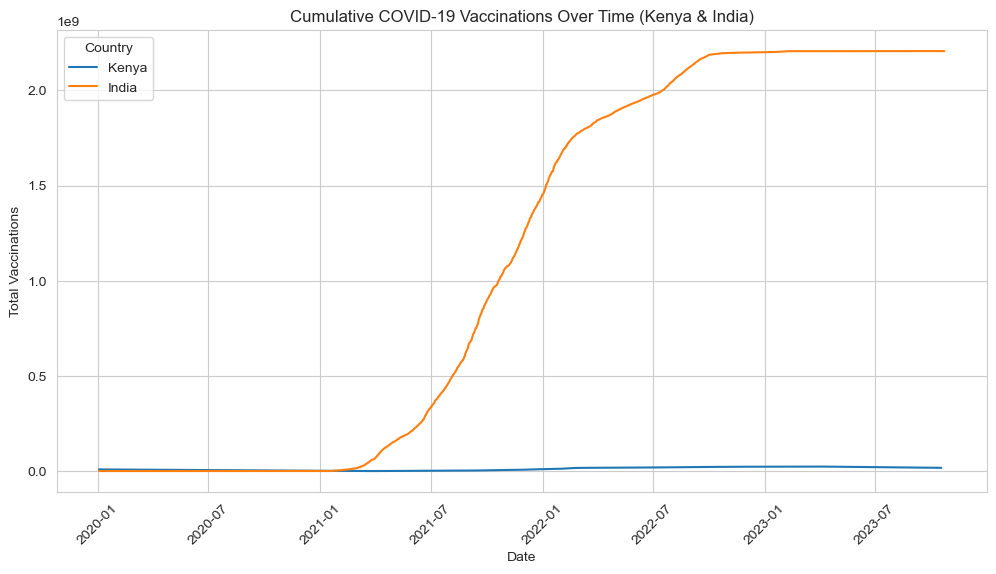

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date to datetime format
df["date"] = pd.to_datetime(df["date"])

# Filter for Kenya & India
df_filtered = df[df["location"].isin(["Kenya", "India"])]

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot cumulative vaccinations over time for each country
for country in ["Kenya", "India"]:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_vaccinations"], label=country)

# Formatting the chart
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Cumulative COVID-19 Vaccinations Over Time (Kenya & India)")
plt.legend(title="Country")
plt.xticks(rotation=45)

# Show plot
plt.show()


### Compare % vaccinated population

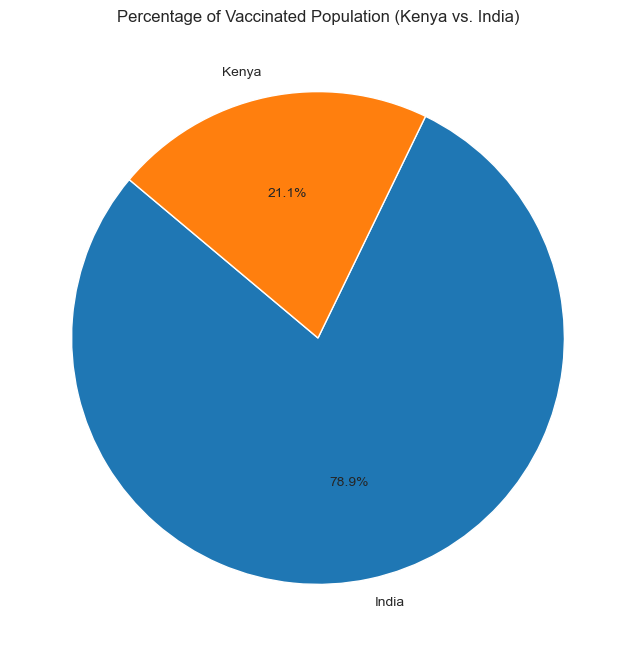

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Get the latest available data for Kenya & India
df_latest = df[df["location"].isin(["Kenya", "India"])].sort_values(by="date").groupby("location").last()

# Calculate percentage of vaccinated population
df_latest["percent_vaccinated"] = (df_latest["people_vaccinated"] / df_latest["population"]) * 100

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_latest["percent_vaccinated"], labels=df_latest.index, autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e"], startangle=140)
plt.title("Percentage of Vaccinated Population (Kenya vs. India)")
plt.show()


### Build a Chloropleth Map: Visualize cases or vaccination rates by country on a world map

In [32]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("cleaned_covid_data.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Get the latest data for each country
latest_data = df.sort_values(by="date").groupby("iso_code").last().reset_index()

# Select relevant columns for visualization
map_data = latest_data[["iso_code", "total_cases", "total_vaccinations"]]

# Plot choropleth map for total cases
fig_cases = px.choropleth(map_data, 
                        locations="iso_code", 
                        color="total_cases",
                        hover_name="iso_code",
                        color_continuous_scale="Reds",
                        title="Global COVID-19 Case Density")

fig_cases.show()

# Plot choropleth map for vaccination rates
fig_vax = px.choropleth(map_data, 
                        locations="iso_code", 
                        color="total_vaccinations",
                        hover_name="iso_code",
                        color_continuous_scale="Blues",
                        title="Global COVID-19 Vaccination Rates")

fig_vax.show()


## Insights & Reporting

### 1️.India had a much faster vaccine rollout compared to Kenya


The choropleth map on vaccination rates shows a higher cumulative number of total vaccinations in India.

The pie chart also confirms that a significantly higher percentage of the Indian population was vaccinated compared to Kenya.

### 2. New cases surged in waves, with visible spikes in both Kenya & India

The heatmap of daily new cases reveals that certain months had extreme spikes, especially in India.

The time-series line charts confirm wave-like patterns, suggesting multiple infection waves.

### 3️. Kenya had a consistently higher death rate relative to total cases

The death rate line chart shows Kenya's rate was higher than India's across most of the timeline.

Possible factors: lower healthcare infrastructure, delayed vaccine rollout, or strain variations affecting mortality rates.

### 4. Case density was uneven across regions globally

The choropleth map revealed clusters of high case density, especially in densely populated regions.

India showed high total cases, but relative case density per million was more controlled compared to smaller nations.

## Anomalies
1. Certain months had zero reported cases, suggesting reporting gaps rather than actual zero infections.<br>
2. Despite India's higher total cases, Kenya had a higher death rate relative to infections.<br>
3. Vaccination rates differed dramatically, with India rolling out vaccines much faster than Kenya.